In [1]:
import itertools
import os
import time
import psutil
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import matplotlib.pyplot as plt
import natsort
import cv2
from skimage.transform import radon
from tensorflow.python.client import device_lib
import gc
import scipy
import multiprocessing as mp

2022-05-12 11:18:15.865298: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '-1'
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14583688621551303053
]


2022-05-12 11:18:18.069582: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-12 11:18:18.072097: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-12 11:18:18.073264: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-12 11:18:18.112373: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-12 11:18:18.112429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: rexio
2022-05-12 11:18:18.112438: I tensorflow/stream_executor/cuda/cuda_di

In [3]:
CR = 0.215  # Compression Ratio

In [4]:
path_cs_dataset = '/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/cs_datasets'
os.chdir(path_cs_dataset)

HR_set = np.load('CS_dataset_labels_Full_wavefield_475_128_512_512.npy', mmap_mode='r+')
HR_set = HR_set.reshape((475*128, 512, 512, 1))
print(HR_set.shape)

CS_arr_original = np.load('Uniform_mesh_applied_512_512_before_interpolation_no_mask.npy', mmap_mode='r+')
CS_arr_original = CS_arr_original.reshape((475*128, 512, 512, 1))
print(CS_arr_original.shape)

CS_arr = np.load('CS_dataset_interpolated_CR_0.215_percent_nyquist_rate_applied_UNIFROM_GRID_32_32.npy', mmap_mode='r+')
CS_arr = CS_arr.reshape((475*128, 32, 32, 1))
print(CS_arr.shape)

CS_arr_DLSS = np.load('CS_dataset_CR_0.215_percent_nyquist_rate_applied_Uniform_grid.npy', mmap_mode='r+')
CS_arr_DLSS = CS_arr_DLSS.reshape((475*128, 32, 32, 1))
print(CS_arr_DLSS.shape)


(60800, 512, 512, 1)
(60800, 512, 512, 1)
(60800, 32, 32, 1)
(60800, 32, 32, 1)


In [83]:
case_num = 474
frame = 64
if frame<=127:
    f = case_num * 128 + frame
else:
    exit()

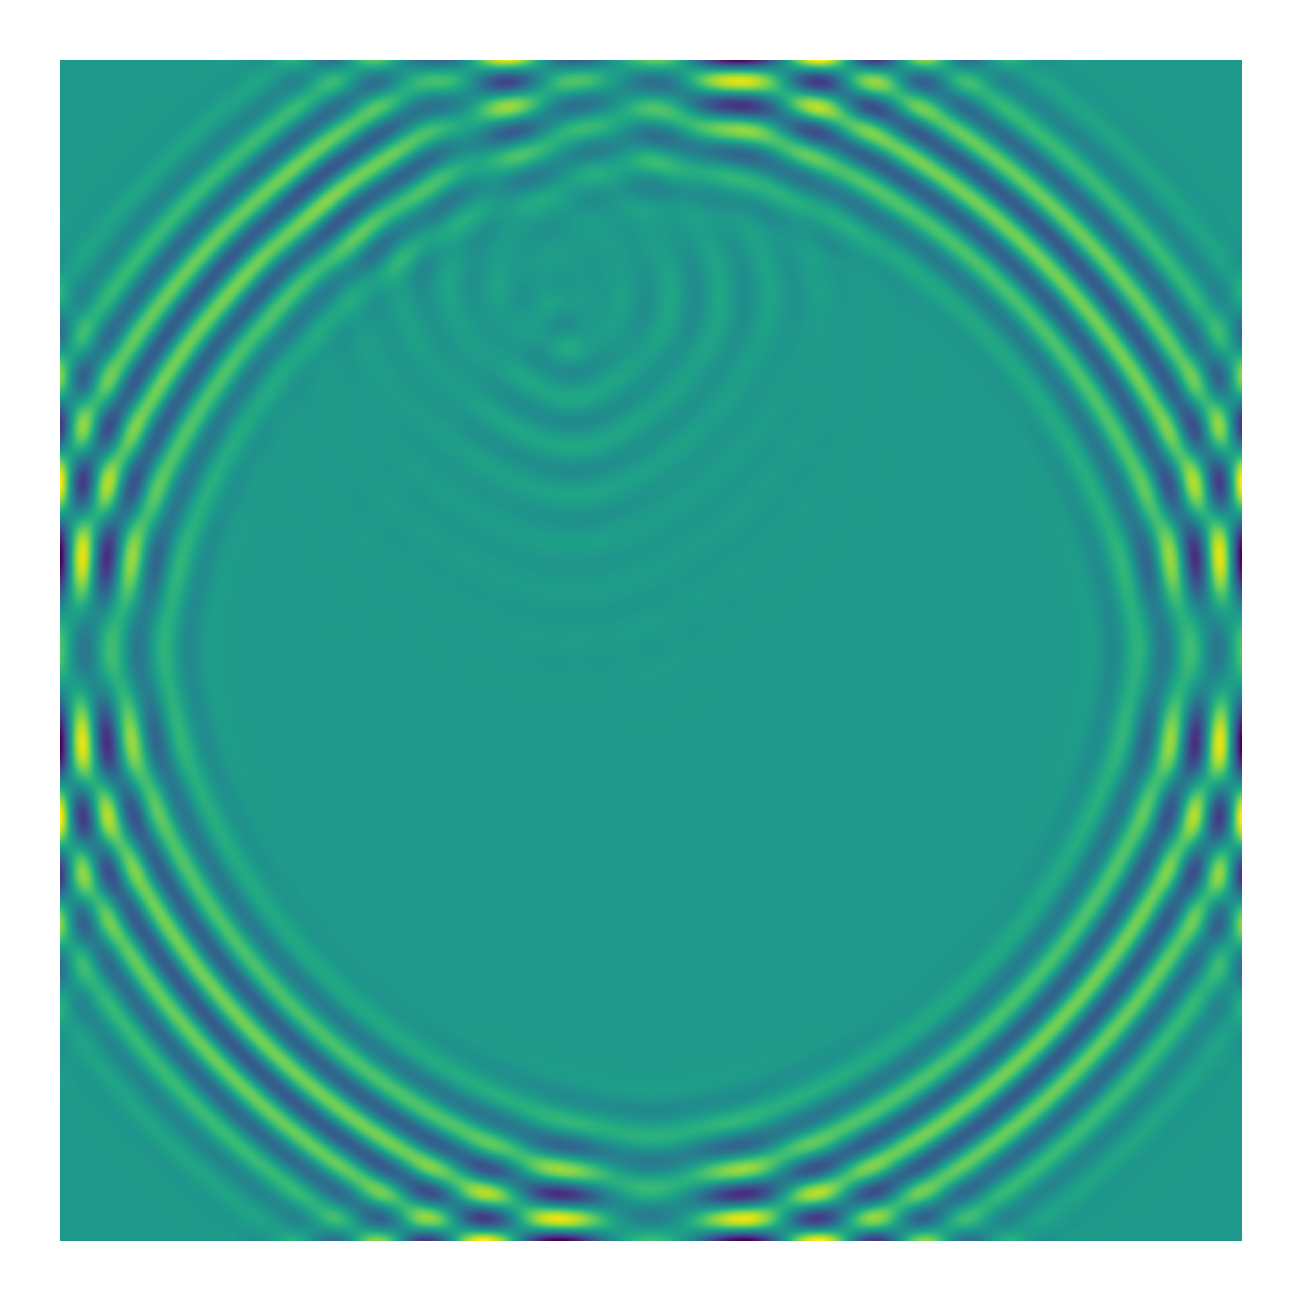

In [84]:
HR = HR_set[f].astype('float32')
######################################################################################################
plt.figure(figsize=(5 / 2.54, 5 / 2.54), dpi=600)
plt.gca().set_axis_off()
plt.axis('off')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0, wspace=0.0, hspace=0.0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
############################################################################################################
plt.imshow(HR)
plt.axis('off')
plt.show
os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/DLSS_images_paper/')
plt.savefig('HR_image_case_%d_frame_%d.png' % (case_num+1, (frame+1)))

In [85]:
LR = CS_arr[f].astype('float32')
LR_DLSS = CS_arr_DLSS[f].astype('float32')
print(len(np.argwhere(np.isnan(LR))))
SR = CS_arr_original[f].astype('float32')
# print(SR.shape)
# print(LR.shape)
# ######################################################################################################
# plt.figure(figsize=(5 / 2.54, 5 / 2.54), dpi=600)
# plt.gca().set_axis_off()
# plt.axis('off')
# plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0, wspace=0.0, hspace=0.0)
# plt.margins(0, 0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
# ############################################################################################################
# plt.imshow(SR)
# plt.axis('off')
# plt.show
# os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/DLSS_images_paper/')
# plt.savefig('Uniform_grid_applied_case_%d_frame_%d.png' % (case_num+1, (frame+1)))


0


In [86]:
# ######################################################################################################
# plt.figure(figsize=(5 / 2.54, 5 / 2.54), dpi=600)
# plt.gca().set_axis_off()
# plt.axis('off')
# plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0, wspace=0.0, hspace=0.0)
# plt.margins(0, 0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
# ############################################################################################################
# plt.imshow(LR)
# plt.axis('off')
# plt.show
# os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/DLSS_images_paper/')
# plt.savefig('LR_case_%d_frame_%d.png' % (case_num+1, (frame+1)))

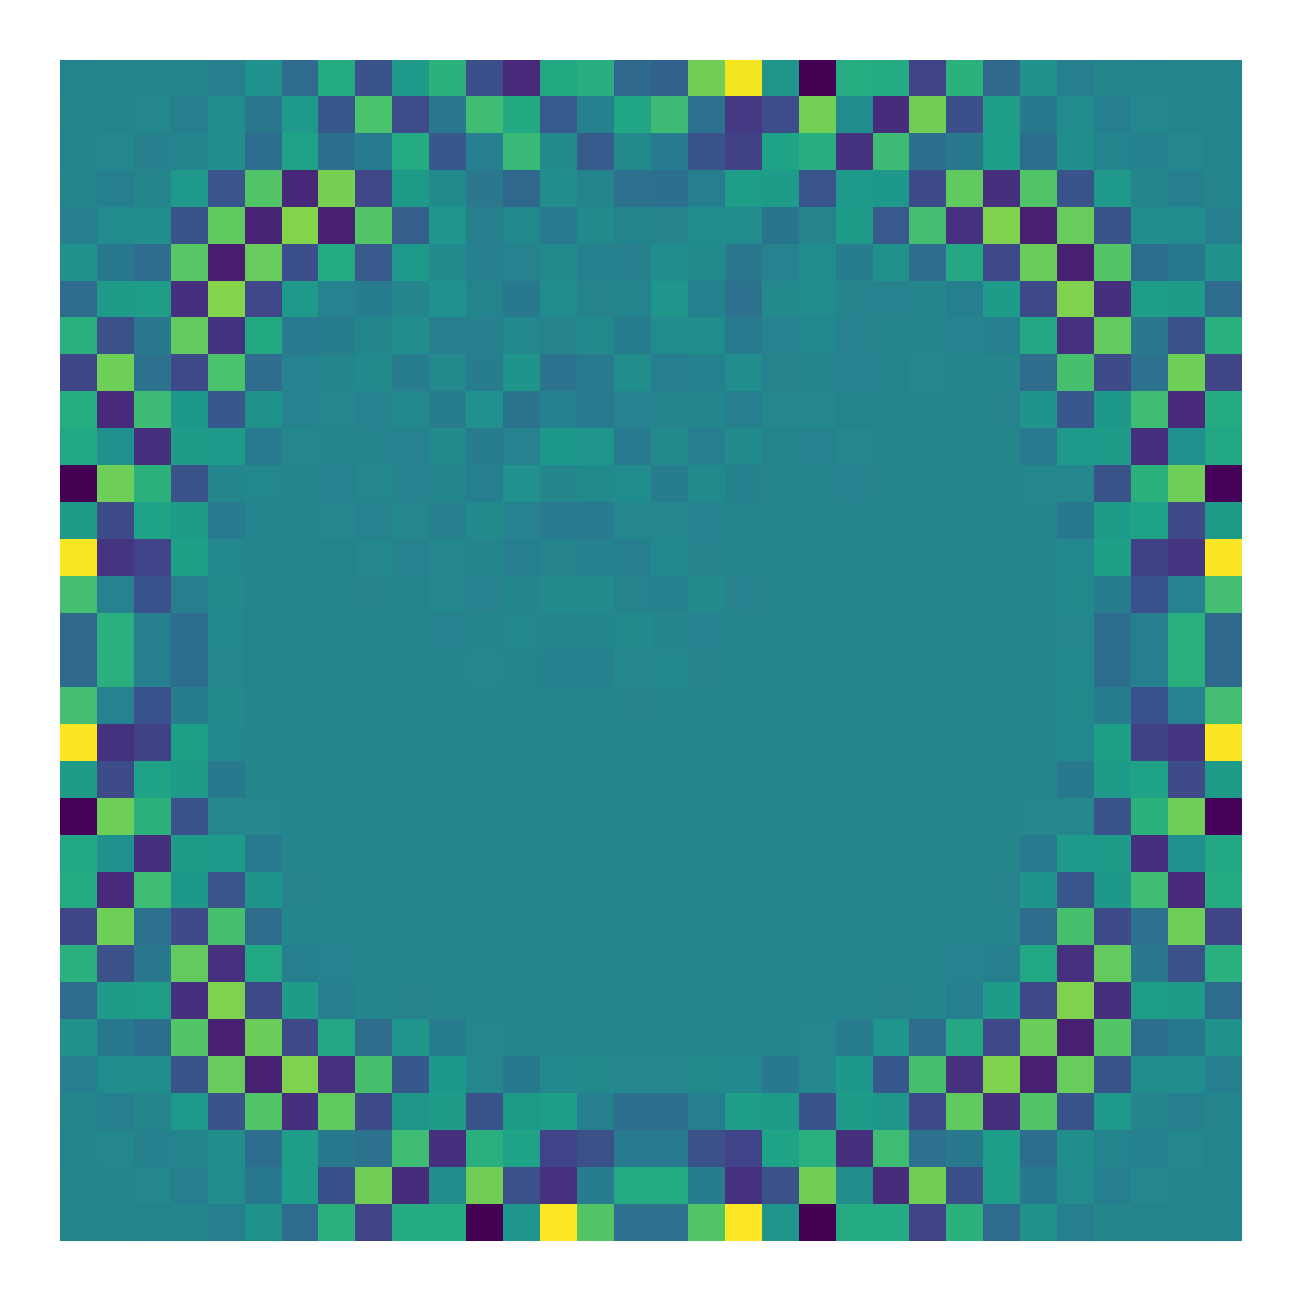

In [87]:
######################################################################################################
plt.figure(figsize=(5 / 2.54, 5 / 2.54), dpi=600)
plt.gca().set_axis_off()
plt.axis('off')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0, wspace=0.0, hspace=0.0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
############################################################################################################
plt.imshow(LR_DLSS)
plt.axis('off')
plt.show
os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/DLSS_images_paper/')
plt.savefig('LR_DLSS_case_%d_frame_%d.png' % (case_num+1, (frame+1)))


In [ ]:
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity

In [ ]:
mse = mean_squared_error(LR_DLSS,LR)
PNSR = peak_signal_noise_ratio(LR_DLSS,LR)
ssim = structural_similarity(LR_DLSS, LR, multichannel=True)
print(mse)
print(PNSR)
print(ssim)

In [ ]:
mean_mse = 0
mean_PNSR = 0
mean_SSIM = 0
for i in range(1,513):
    os.chdir('/home/aijjeh/Desktop/Phd_Projects/compressive_sensing_project/Experimental/Uniform_mesh/Compression_ration_0.215')    
    Output = cv2.imread('SR_Pred_output_%d_frame.png' %i, 0)
    pred = Output[:1181, 1181:-1181]     
    plt.imshow(pred.astype(np.float32))
    plt.axis('off')
    plt.show()
    print(np.max(pred))
    
    GT = Output[:1181, -1181:]
    plt.imshow(GT.astype(np.float32))
    plt.axis('off')
    plt.show()
    
    print(np.max(GT))
          
    mse = mean_squared_error(pred,GT)
    PNSR = peak_signal_noise_ratio(pred,GT)
    ssim = structural_similarity(pred,GT, multichannel=True)
    print('MSE pred_%d' %i, mse)
    print('PNSR pred_%d' %i, PNSR)
    print('SSIM pred_%d' %i, ssim)
    mean_mse = mean_mse + mse
    mean_PNSR = mean_PNSR + PNSR
    mean_SSIM = mean_SSIM + ssim
print('Mean MSE: ', mse)
print('Mean PNSR: ', PNSR)
print('Mean SSIM: ', ssim)    
    
    

In [ ]:
print('Mean MSE: ', mean_mse / 512 )
print('Mean PNSR: ', mean_PNSR / 512)
print('Mean SSIM: ', mean_SSIM / 512) 

In [ ]:
img = Full_W_dataset[45].astype('float32')
plt.imshow(img)
plt.show()

In [ ]:
img = img.reshape(512, 512)
print(img.shape)
# img_nyquist = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)

In [ ]:
mask = np.zeros((512*512,), dtype=np.float32)

In [ ]:
print(mask)

In [ ]:
values = np.random.choice(np.arange(0, 512**2), 32**2, replace=False)
values.sort()
print(values)

In [ ]:
print(len(values))

In [ ]:
for i in range(len(values)):
    mask[values[i]] = 1

In [ ]:
mask = mask.reshape((512,512))

In [ ]:
new_img = mask * img

In [ ]:
plt.imshow(new_img)
plt.show()

In [ ]:
array = np.ma.masked_where(mask==0, mask)

new_arr_ = new_img[~array.mask]


In [ ]:
x = range(512)
y = range(512)

xx, yy = np.meshgrid(x, y)
x1 = xx[~array.mask]
y1 = yy[~array.mask]

In [ ]:
x_new, y_new = np.linspace(0, 512, 32), np.linspace(0, 512, 32)
xq, yq = np.meshgrid(x_new, y_new)
GD1 = scipy.interpolate.griddata((x1, y1), new_arr_.flatten(), (xq, yq), method='cubic', fill_value=np.mean(new_arr_))

In [ ]:
plt.imshow(GD1)
plt.show()